<a href="https://colab.research.google.com/github/AustinYanSebasmannAlderhaz/generative_ai/blob/main/41073125H_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Q：我想在Colab中畫方波的傅立葉級數，請問該怎麼做?

###ChatGPT 的回應：
在 **Google Colab** 中，可以使用 **傅立葉級數（Fourier Series）** 來近似 **方波（Square Wave）**。傅立葉級數表示一個週期函數為**正弦波的無窮和**，其中**方波**的傅立葉級數表示如下：

$$
f(x) = \frac{4}{\pi} \sum_{n=1,3,5,\dots}^{\infty} \frac{1}{n} \sin(n x)
$$

這表示方波可以用奇數次的正弦波來近似。當我們增加項數時，波形會更接近理想的方波。

---

## **步驟**
1. **定義傅立葉級數的函數**
2. **選擇不同的展開項數 \(N\) 來觀察近似程度**
3. **使用 `matplotlib` 繪製結果**

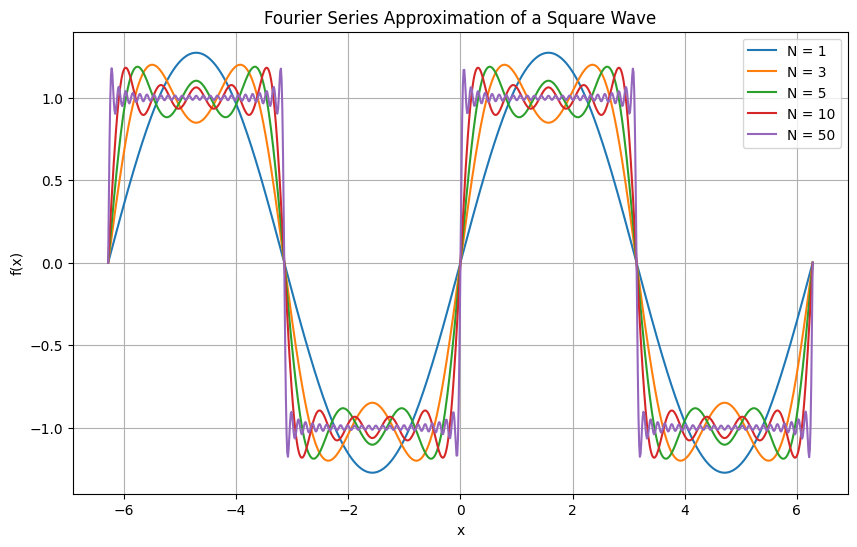

In [4]:
# 定義傅立葉級數的函數
def fourier_square_wave(x, N):
    """計算方波的傅立葉級數展開（使用前 N 項）"""
    y = np.zeros_like(x)
    for n in range(1, N+1, 2):  # 只取奇數項 (1, 3, 5, ...)
        y += (4 / (np.pi * n)) * np.sin(n * x)
    return y

# 定義 x 軸範圍
x = np.linspace(-2*np.pi, 2*np.pi, 1000)

# 設定不同的 N 值來觀察近似效果
N_values = [1, 3, 5, 10, 50]  # 觀察 1, 3, 5, 10, 50 項時的情況

plt.figure(figsize=(10, 6))

for N in N_values:
    y = fourier_square_wave(x, N)
    plt.plot(x, y, label=f'N = {N}')


# 圖片設定
plt.title("Fourier Series Approximation of a Square Wave")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)



###Q：我想在你提供的以下程式碼修改，加入數值滑桿，用來控制N的數量，最低為1最高為100
###ChatGPT 的回應：
這裡是加入**數值滑桿（Slider）**的版本，使用 ipywidgets 來控制 N 的數量（1~100），並即時更新圖形。這樣你可以透過滑桿動態調整 N，觀察方波的傅立葉級數近似效果！

In [19]:
import ipywidgets as widgets
from IPython.display import display

def fourier_square_wave(x, N):
    y = np.zeros_like(x)
    for n in range(1, N+1, 2):
        y += (4 / (np.pi * n)) * np.sin(n * x)
    return y

x = np.linspace(-2*np.pi, 2*np.pi, 1000)

def plot_fourier(N):
    plt.figure(figsize=(10, 6))
    y = fourier_square_wave(x, N)
    plt.plot(x, y, label=f'N = {N}', color='blue')

    plt.title("Fourier Series Approximation of a Square Wave")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

# 創建滑桿（控制 N，範圍 1~100，步長 1）
slider = widgets.IntSlider(value=1, min=1, max=100, step=1, description='N')
widgets.interactive(plot_fourier, N=slider)



interactive(children=(IntSlider(value=1, description='N', min=1), Output()), _dom_classes=('widget-interact',)…

###Q：幫我在以下程式碼加入以下新功能：

1. 完整的理論公式展示
2. 顯示不同 N 值的誤差


###ChatGPT 的回應：
這個改進版本包含了兩個新功能：
1. 完整的理論公式展示：顯示傅立葉級數的數學公式。
2. 顯示不同 N 值的誤差：計算傅立葉展開與理想方波的均方誤差 (MSE)。

In [20]:
from IPython.display import display, Markdown

def fourier_square_wave(x, N):
    y = np.zeros_like(x)
    for n in range(1, N+1, 2):
        y += (4 / (np.pi * n)) * np.sin(n * x)
    return y

# 定義誤差計算函數
def compute_error(x, N):
    """計算傅立葉展開與理想方波的均方誤差 (MSE)"""
    y_true = np.sign(np.sin(x))  # 理想方波
    y_approx = fourier_square_wave(x, N)
    error = np.mean((y_true - y_approx) ** 2)  # 均方誤差
    return error

x = np.linspace(-2*np.pi, 2*np.pi, 1000)

def plot_fourier(N):
    plt.figure(figsize=(10, 6))
    y = fourier_square_wave(x, N)
    plt.plot(x, y, label=f'N = {N}', color='blue')


    plt.title("Fourier Series Approximation of a Square Wave")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # 顯示傅立葉級數理論公式
    display(Markdown(r"$$ f(x) = \frac{4}{\pi} \sum_{n=1}^{N} \frac{1}{n} \sin(n x) $$"))

    # 計算並顯示均方誤差 (MSE)
    error = compute_error(x, N)
    display(Markdown(f"**均方誤差 (MSE):** {error:.5f}"))

slider = widgets.IntSlider(value=1, min=1, max=100, step=1, description='N')
widgets.interactive(plot_fourier, N=slider)


interactive(children=(IntSlider(value=1, description='N', min=1), Output()), _dom_classes=('widget-interact',)…

###Q：幫我在以下程式碼加入以下新功能：

1. 可調整振幅的滑桿
2. 可調整頻率的滑桿


###ChatGPT 的回應：
這個改進版本包含了兩個新功能：
1. 可調整振幅的滑桿（Amplitude）：控制傅立葉級數的最大振幅。
2. 可調整頻率的滑桿（Frequency）：改變波形的頻率，使波形壓縮或展開。

In [21]:
def fourier_square_wave(x, N, amplitude, frequency):
    y = np.zeros_like(x)
    for n in range(1, N+1, 2):
        y += (4 / (np.pi * n)) * np.sin(n * frequency * x)
    return amplitude * y  # 調整振幅

def compute_error(x, N, amplitude, frequency):
    y_true = amplitude * np.sign(np.sin(frequency * x))  # 調整振幅與頻率
    y_approx = fourier_square_wave(x, N, amplitude, frequency)
    error = np.mean((y_true - y_approx) ** 2)  # 均方誤差
    return error

x = np.linspace(-2*np.pi, 2*np.pi, 1000)

def plot_fourier(N, amplitude, frequency):
    plt.figure(figsize=(10, 6))
    y = fourier_square_wave(x, N, amplitude, frequency)
    plt.plot(x, y, label=f'N = {N}', color='blue')


    plt.title("Fourier Series Approximation of a Square Wave")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

    display(Markdown(r"$$ f(x) = A \cdot \frac{4}{\pi} \sum_{n=1}^{N} \frac{1}{n} \sin(n \cdot f \cdot x) $$"))
    display(Markdown(f"**A (振幅):** {amplitude}, **f (頻率):** {frequency}"))

    error = compute_error(x, N, amplitude, frequency)
    display(Markdown(f"**均方誤差 (MSE):** {error:.5f}"))

N_slider = widgets.IntSlider(value=1, min=1, max=100, step=1, description='N')
amplitude_slider = widgets.FloatSlider(value=1.0, min=0.5, max=2.0, step=0.1, description='Amplitude')
frequency_slider = widgets.FloatSlider(value=1.0, min=0.5, max=5.0, step=0.1, description='Frequency')

widgets.interactive(plot_fourier, N=N_slider, amplitude=amplitude_slider, frequency=frequency_slider)



interactive(children=(IntSlider(value=1, description='N', min=1), FloatSlider(value=1.0, description='Amplitud…